In [27]:
import pandas as pd
import my_utils_cho as mu
import requests
import matplotlib.pyplot as plt


from tqdm import tqdm
tqdm.pandas()
import my_def_cho as md
import plotly
import plotly.express as px
import time
import cufflinks

from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) #윈도우

In [2]:
api_key = 'RGAPI-474558e0-2044-46aa-b0b7-ef634af1aa9b'

In [3]:
md.set_api_key(api_key)

In [4]:
df = md.get_rawData('BRONZE')

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.01it/s]


In [5]:
df

,match_id,matches,timeline
0,KR_6006026546,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
1,KR_6006034098,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
2,KR_6005984176,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."


In [6]:
all_df = md.get_dataframe_from_game_data(df)

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 501.33it/s]

complete! the number of df is 3


In [7]:
all_df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25
0,6006034098,2134,12.12.450.4196,MSG중독자,277,1,Gnar,17679,TOP,100,...,6378,7566,8315,8516,9414,9549,10028,10150,10467,10653
1,6006034098,2134,12.12.450.4196,우주류 검성,323,2,Kindred,15648,JUNGLE,100,...,5887,6232,6355,6762,7722,7968,8447,8570,8787,9149
2,6006034098,2134,12.12.450.4196,BorosRe0,77,3,Zeri,21745,MIDDLE,100,...,5200,5465,5778,6110,6491,6823,7025,7364,7629,7930
3,6006034098,2134,12.12.450.4196,화장실쇠뚜껑,217,4,Vayne,14440,BOTTOM,100,...,4315,4521,4790,4913,5204,5379,6293,6479,6880,7093
4,6006034098,2134,12.12.450.4196,자연1,218,5,Thresh,12848,UTILITY,100,...,4016,4266,4470,4781,4969,5110,5350,5525,5666,5836
5,6006034098,2134,12.12.450.4196,010 3006 7619,215,6,Malphite,16322,TOP,200,...,5634,6224,6663,6825,6948,7311,7483,7718,8284,8466
6,6006034098,2134,12.12.450.4196,선우 김선달,221,7,Viego,17915,JUNGLE,200,...,6501,6874,7173,7451,7663,8821,9224,9918,10165,10603
7,6006034098,2134,12.12.450.4196,bita dolce,130,8,Talon,16534,MIDDLE,200,...,5101,5295,5501,5624,5974,6146,6598,6841,7173,7295
8,6006034098,2134,12.12.450.4196,Psychology 진,88,9,Jhin,17564,BOTTOM,200,...,7197,7586,8161,8429,9295,9558,10030,10508,11001,11344
9,6006034098,2134,12.12.450.4196,즌 강 민,98,10,Lux,18558,UTILITY,200,...,5963,6412,6705,6866,7082,7342,7832,8151,8333,8607


In [8]:
all_df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'baronKills',
       'teamElderDragonKills', 'dragonKills', 'teamRiftHeraldKills', 'g_5',
       'g_6', 'g_7', 'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14',
       'g_15', 'g_16', 'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23',
       'g_24', 'g_25'],
      dtype='object')

In [9]:
mu.db_open_local()

open!


In [10]:
df = mu.sql_execute('select * from match_data_take')

C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [11]:
df

,GAMEID,PARTICIPANTID,GAMEDURATION,GAMEVERSION,SUMMONERNAME,SUMMONERLEVEL,CHAMPIONNAME,CHAMPEXPERIENCE,TEAMPOSITION,TEAMID,...,G_16,G_17,G_18,G_19,G_20,G_21,G_22,G_23,G_24,G_25
0,6001125156,1,1451,12.12.450.4196,한강에사는연어,312,Khazix,8501,JUNGLE,100,...,6682,6809,6991,7663,8082,8479,9979,10228,10526,10549
1,6001125156,2,1451,12.12.450.4196,원태씨,165,TahmKench,6252,BOTTOM,100,...,3675,3797,3919,4184,4427,4579,4731,4854,4976,4998
2,6001125156,3,1451,12.12.450.4196,내여친소영이,189,Singed,7690,MIDDLE,100,...,3507,3871,4250,4535,4945,5271,5477,5600,5737,5760
3,6001125156,4,1451,12.12.450.4196,한강에사는곰,58,Darius,10640,TOP,100,...,5112,5682,6012,6455,6803,6926,7090,7213,7345,7367
4,6001125156,5,1451,12.12.450.4196,YHBIN,225,Senna,7870,UTILITY,100,...,4955,5261,5481,5760,6137,6398,6804,6974,7173,7199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14724,5986312593,6,625,12.12.450.4196,nishishanma,119,Ezreal,3032,BOTTOM,200,...,0,0,0,0,0,0,0,0,0,0
14725,5986312593,7,625,12.12.450.4196,비원딜 하지마라,185,Pyke,2975,UTILITY,200,...,0,0,0,0,0,0,0,0,0,0
14726,5986312593,8,625,12.12.450.4196,글로벌입니다,336,Rumble,3907,MIDDLE,200,...,0,0,0,0,0,0,0,0,0,0
14727,5986312593,9,625,12.12.450.4196,만 영,400,Graves,3430,JUNGLE,200,...,0,0,0,0,0,0,0,0,0,0


In [12]:
mu.db_close()

'close!'

In [13]:
df = df[['GAMEID','GAMEDURATION','GAMEVERSION','SUMMONERNAME','SUMMONERLEVEL','PARTICIPANTID','CHAMPIONNAME','CHAMPEXPERIENCE','TEAMPOSITION','TEAMID','WIN','KILLS','DEATHS','ASSISTS','TOTALDAMAGEDEALTTOCHAMPIONS','TOTALDAMAGETAKEN','G_5','G_6','G_7','G_8','G_9','G_10','G_11','G_12','G_13','G_14','G_15','G_16','G_17','G_18','G_19','G_20']]

In [14]:
#df = all_df[['gameId','gameDuration','gameVersion','summonerName','summonerLevel','participantId','championName','champExperience','teamPosition','teamId','win','kills','deaths','assists','totalDamageDealtToChampions','totalDamageTaken','g_5','g_6','g_7','g_8','g_9','g_10','g_11','g_12','g_13','g_14','g_15','g_16','g_17','g_18','g_19','g_20']]

In [15]:
df

,GAMEID,GAMEDURATION,GAMEVERSION,SUMMONERNAME,SUMMONERLEVEL,PARTICIPANTID,CHAMPIONNAME,CHAMPEXPERIENCE,TEAMPOSITION,TEAMID,...,G_11,G_12,G_13,G_14,G_15,G_16,G_17,G_18,G_19,G_20
0,6001125156,1451,12.12.450.4196,한강에사는연어,312,1,Khazix,8501,JUNGLE,100,...,3540,3952,4576,4983,5321,6682,6809,6991,7663,8082
1,6001125156,1451,12.12.450.4196,원태씨,165,2,TahmKench,6252,BOTTOM,100,...,2698,2876,3113,3257,3477,3675,3797,3919,4184,4427
2,6001125156,1451,12.12.450.4196,내여친소영이,189,3,Singed,7690,MIDDLE,100,...,2483,2605,2926,3049,3192,3507,3871,4250,4535,4945
3,6001125156,1451,12.12.450.4196,한강에사는곰,58,4,Darius,10640,TOP,100,...,3328,3738,4030,4300,4422,5112,5682,6012,6455,6803
4,6001125156,1451,12.12.450.4196,YHBIN,225,5,Senna,7870,UTILITY,100,...,2986,3129,3888,4069,4362,4955,5261,5481,5760,6137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14724,5986312593,625,12.12.450.4196,nishishanma,119,6,Ezreal,3032,BOTTOM,200,...,3700,0,0,0,0,0,0,0,0,0
14725,5986312593,625,12.12.450.4196,비원딜 하지마라,185,7,Pyke,2975,UTILITY,200,...,3002,0,0,0,0,0,0,0,0,0
14726,5986312593,625,12.12.450.4196,글로벌입니다,336,8,Rumble,3907,MIDDLE,200,...,3873,0,0,0,0,0,0,0,0,0
14727,5986312593,625,12.12.450.4196,만 영,400,9,Graves,3430,JUNGLE,200,...,3262,0,0,0,0,0,0,0,0,0


In [16]:
take_df = df[['CHAMPIONNAME','TOTALDAMAGEDEALTTOCHAMPIONS','TOTALDAMAGETAKEN']]

In [17]:
take_df

,CHAMPIONNAME,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN
0,Khazix,13660,20452
1,TahmKench,3625,19840
2,Singed,7345,20161
3,Darius,12787,19847
4,Senna,11242,11033
...,...,...,...
14724,Ezreal,4752,4486
14725,Pyke,2719,4569
14726,Rumble,6576,7425
14727,Graves,482,6321


In [18]:
take_df = take_df.groupby('CHAMPIONNAME').mean().round(2).reset_index()

In [19]:
take_df

,CHAMPIONNAME,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN
0,Aatrox,19638.45,30609.30
1,Ahri,18891.18,20133.34
2,Akali,21327.57,25495.87
3,Akshan,18933.46,19567.37
4,Alistar,7292.36,22061.31
...,...,...,...
155,Zeri,19277.70,19991.97
156,Ziggs,20367.65,15448.65
157,Zilean,10336.74,14571.47
158,Zoe,18373.78,16566.97


In [31]:
fig = px.scatter(df, title='챔피언별 딜량 및 피해량 그래프',
                x = 'TOTALDAMAGEDEALTTOCHAMPIONS',
                y = 'TOTALDAMAGETAKEN',
                color = 'CHAMPIONNAME')

plotly.offline.iplot(fig)

In [22]:
gold_df = df[['CHAMPIONNAME','TEAMPOSITION','G_15']]
gold_df

,CHAMPIONNAME,TEAMPOSITION,G_15
0,Khazix,JUNGLE,5321
1,TahmKench,BOTTOM,3477
2,Singed,MIDDLE,3192
3,Darius,TOP,4422
4,Senna,UTILITY,4362
...,...,...,...
14724,Ezreal,BOTTOM,0
14725,Pyke,UTILITY,0
14726,Rumble,MIDDLE,0
14727,Graves,JUNGLE,0


In [24]:
gold_df = gold_df.groupby('TEAMPOSITION').mean().reset_index()

In [25]:
gold_df

,TEAMPOSITION,G_15
0,BOTTOM,5414.154372
1,JUNGLE,5478.915329
2,MIDDLE,5221.202113
3,TOP,5114.567179
4,UTILITY,4092.297168


Text(0.5, 1.0, '라인별 15분 골드 그래프')

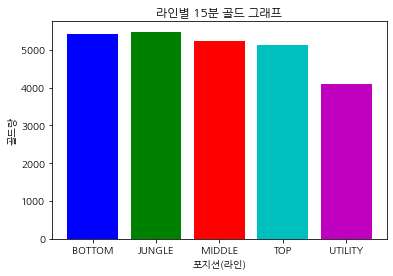

In [29]:
plt.figure()
plt.bar(gold_df.TEAMPOSITION,gold_df.G_15, color = ['b','g','r','c','m'])
plt.xlabel('포지션(라인)')
plt.ylabel('골드량')
plt.title('라인별 15분 골드 그래프')